In [904]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

In [806]:
file_path = r"D:\ML Projects\adult\adult.data"  
df = pd.read_csv(file_path)

In [808]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [810]:
#adding Column Names in the data set.

names_of_coulmns = ['age', 'employment', 'final_weight', 'education', 'education_number',
                'marital_status', 'profession', 'relationship', 'race', 'gender',
                'capital-gain', 'capital-loss', 'week_hours', 'country', 'income']

# Renaming the columns in the dataset
df.columns = names_of_coulmns

#Displaying the column names of dataset after assigning names.
df.head()

,age,employment,final_weight,education,education_number,marital_status,profession,relationship,race,gender,capital-gain,capital-loss,week_hours,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [812]:
df.dtypes

age                  int64
employment          object
final_weight         int64
education           object
education_number     int64
marital_status      object
profession          object
relationship        object
race                object
gender              object
capital-gain         int64
capital-loss         int64
week_hours           int64
country             object
income              object
dtype: object

In [814]:
#making '?' consistent removing spaces in the columnIde
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#identifying Missing Values in columns
df.replace("?", np.nan, inplace=True)

missing_data = df.isnull().sum()

print(missing_data[missing_data > 0])

employment    1836
profession    1843
country        583
dtype: int64


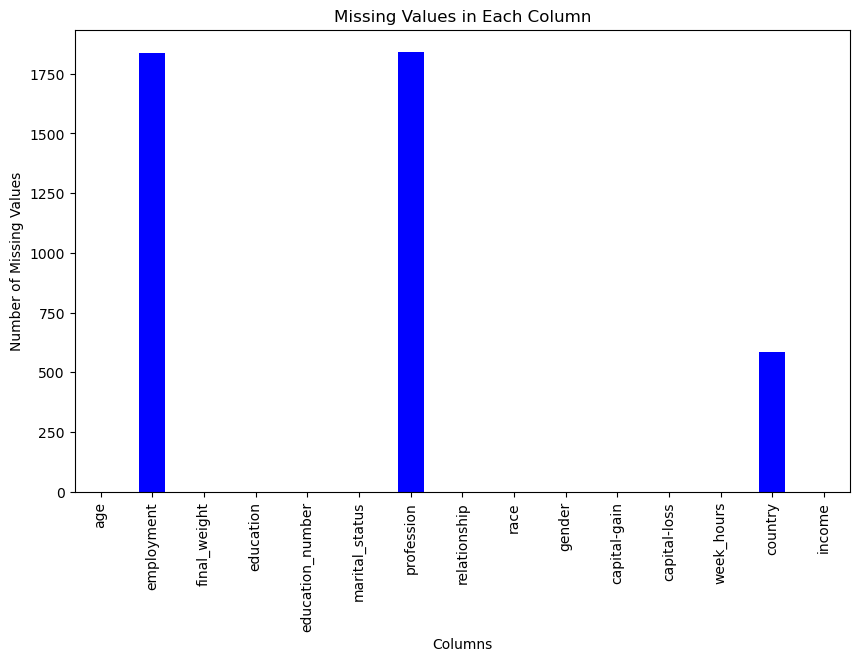

In [816]:
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='blue')

plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

plt.show()

In [817]:
df.replace("?", np.nan, inplace=True)

# Replaceing the  missing values in 'employment' and 'profession' columns with their mode
df['employment'].fillna(df['employment'].mode()[0], inplace=True)
df['profession'].fillna(df['profession'].mode()[0], inplace=True)

#Missing values are filled 
print(df[['employment', 'profession']].isnull().sum())
print('Missing values are replaced by Mode of the columns of employement & profession')

employment    0
profession    0
dtype: int64
Missing values are replaced by Mode of the columns of employement & profession


C:\Users\wahab\AppData\Local\Temp\ipykernel_16232\3020488644.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employment'].fillna(df['employment'].mode()[0], inplace=True)
C:\Users\wahab\AppData\Local\Temp\ipykernel_16232\3020488644.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [818]:
missing_country_rows = df[df['country'].isnull()]
print(missing_country_rows)

#Droping rows
df.dropna(subset=['country'], inplace=True)

print('Values with missing rows are deleted')

       age        employment  final_weight     education  education_number  \
13      40           Private        121772     Assoc-voc                11   
37      31           Private         84154  Some-college                10   
50      18           Private        226956       HS-grad                 9   
60      32           Private        293936       7th-8th                 4   
92      30           Private        117747       HS-grad                 9   
...    ...               ...           ...           ...               ...   
32448   44      Self-emp-inc         71556       Masters                14   
32468   58      Self-emp-inc        181974     Doctorate                16   
32491   42  Self-emp-not-inc        217597       HS-grad                 9   
32509   39           Private        107302       HS-grad                 9   
32524   81           Private        120478     Assoc-voc                11   

              marital_status      profession   relationship  \


In [819]:
#Checking unqiue values in the column to standarize it
cat_columns = ['employment', 'education', 'marital_status', 'profession',
                       'relationship', 'race', 'gender', 'country', 'income']

# Looping through each categorical column and print unique values
for column in cat_columns:
    values = df[column].unique()
    print(f"Distinct entries in '{column}': {values}\n")

Distinct entries in 'employment': ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Distinct entries in 'education': ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Distinct entries in 'marital_status': ['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']

Distinct entries in 'profession': ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

Distinct entries in 'relationship': ['Husband' 'Not-in-family' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Distinct entries in 'race': ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Distinct

In [820]:
df.describe()

,age,final_weight,education_number,capital-gain,capital-loss,week_hours
count,31977.000000,3.197700e+04,31977.000000,31977.000000,31977.000000,31977.000000
mean,38.579010,1.897177e+05,10.071145,1064.325922,86.742065,40.417863
std,13.662298,1.057253e+05,2.560655,7298.707758,401.600288,12.345478
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.373790e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [823]:
def plot_box(data, column_name):
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=data[column_name])
    plt.ylabel(column_name)
    plt.title(f'{column_name} - Box Plot')
    plt.show()

In [826]:
def plot_histogram(data, column_name):
    plt.figure(figsize=(10, 5))
    sns.histplot(data[column_name], bins=20, kde=True)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'{column_name} - Histogram')
    plt.show()

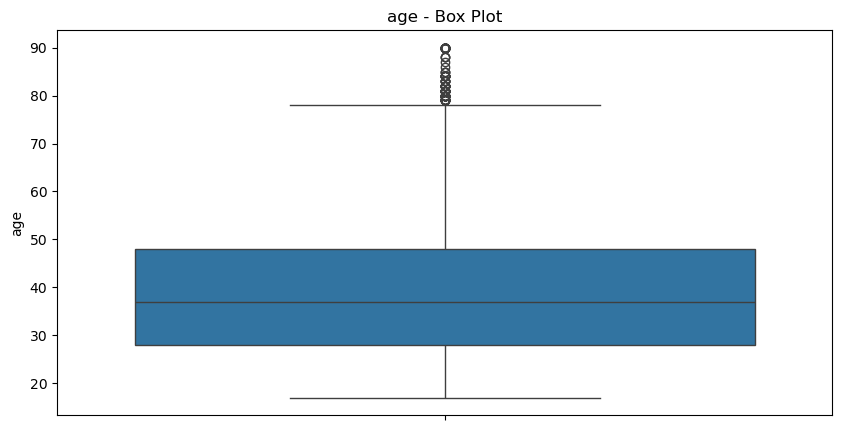

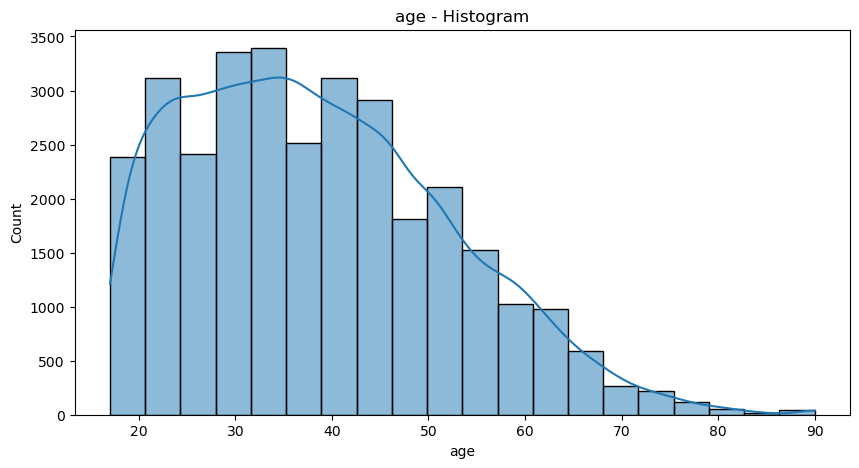

In [828]:
#checking outliers in the Age Column
plot_box(df, 'age')
plot_histogram(df, 'age')

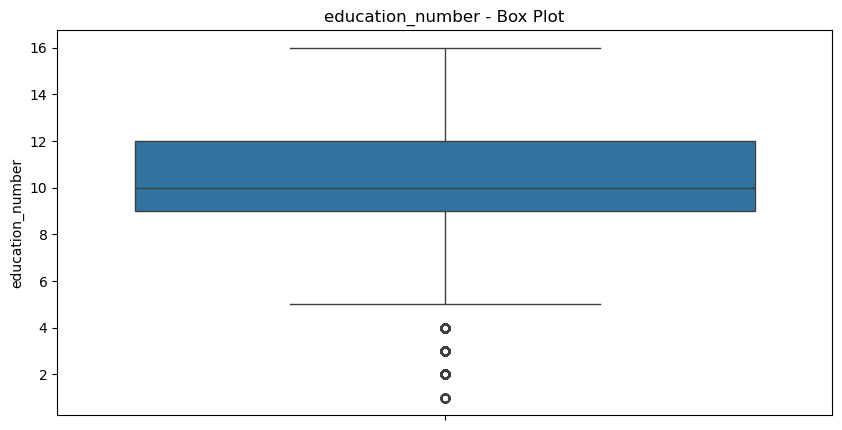

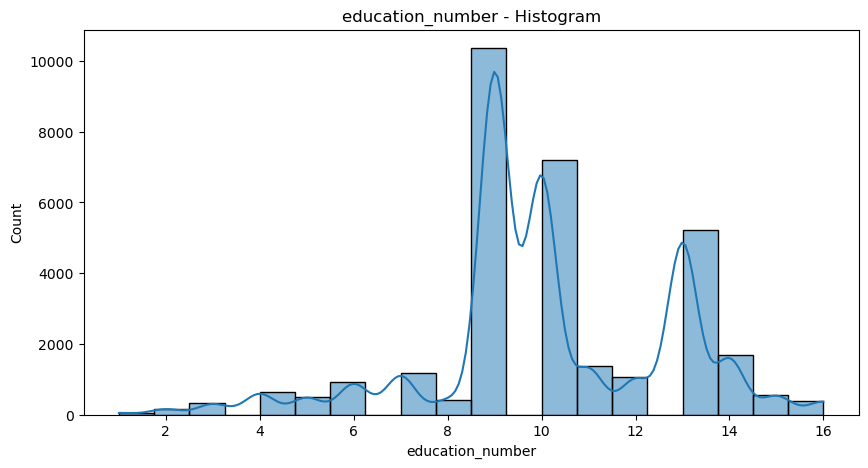

In [830]:
#checking outliers in the Education Numbers
plot_box(df, 'education_number')
plot_histogram(df, 'education_number')

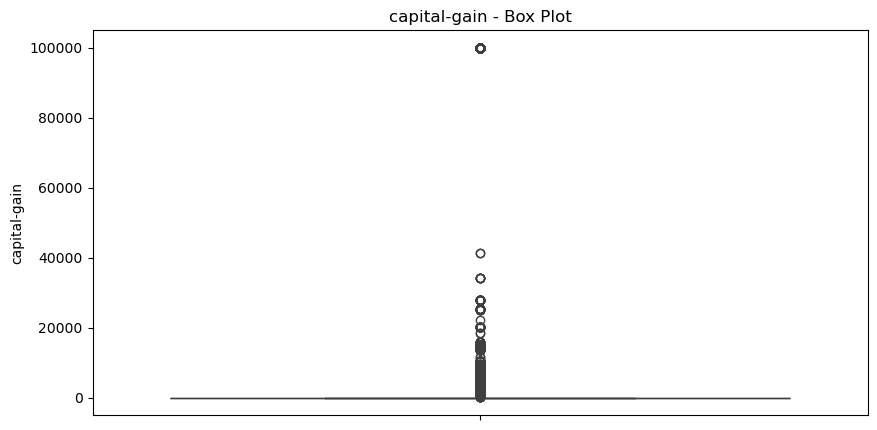

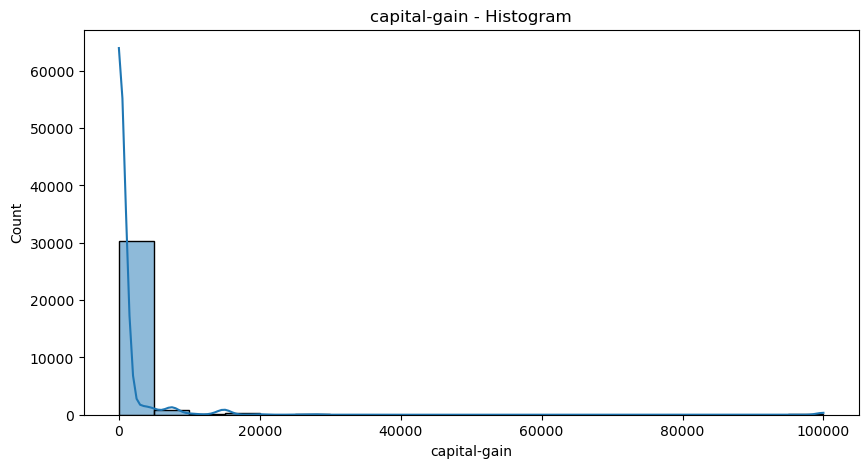

In [831]:
#checking outliers in the capital Gain
plot_box(df, 'capital-gain')
plot_histogram(df, 'capital-gain')

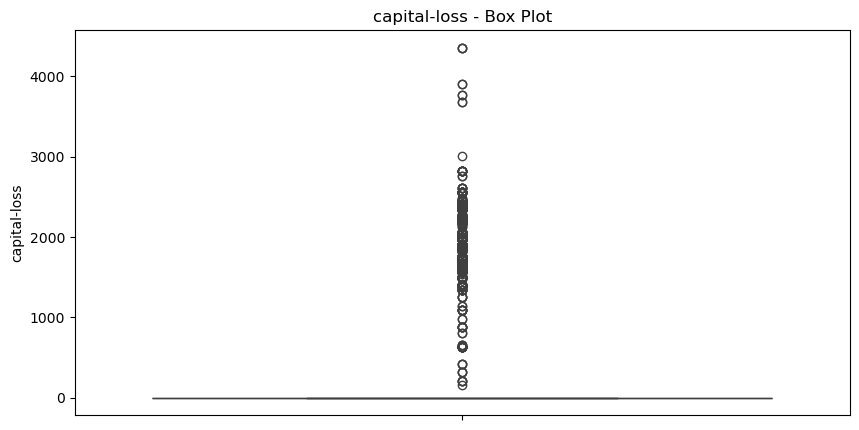

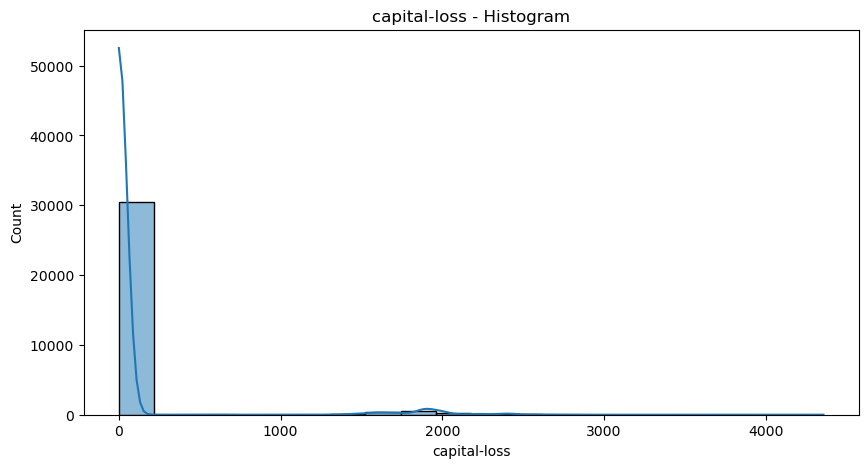

In [833]:
#checking outliers in the Capital Loss
plot_box(df, 'capital-loss')
plot_histogram(df, 'capital-loss')

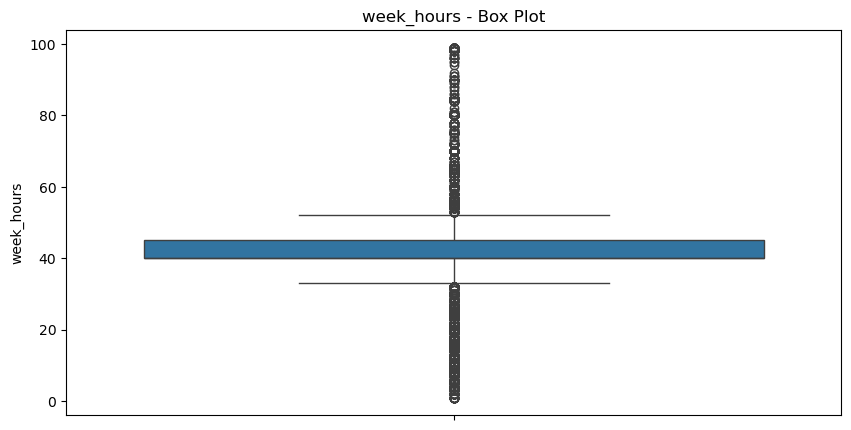

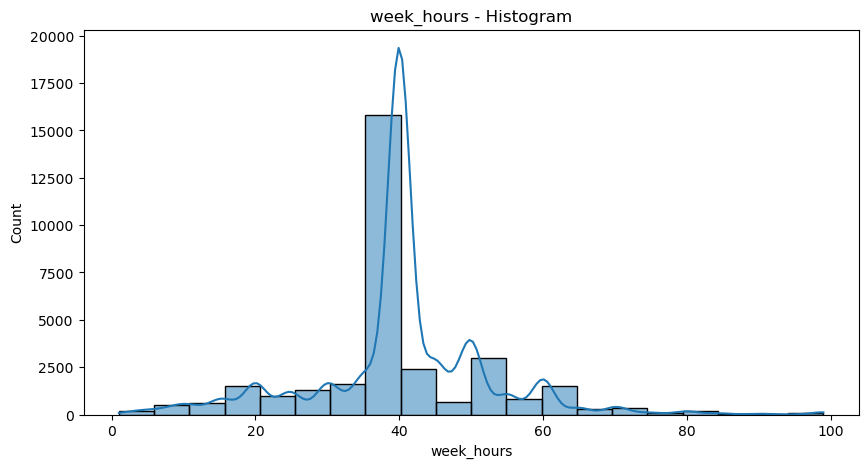

In [834]:
#checking outliers in the Weekly Hours
plot_box(df, 'week_hours')
plot_histogram(df, 'week_hours')

In [840]:
anova_features = ['age', 'final_weight', 'education_number', 'capital-gain', 'capital-loss', 'week_hours']
anova_results = {}

for feature in anova_features:
    groups = [df[feature][df['income'] == category] for category in df['income'].unique()]
    anova_results[feature], p_value = stats.f_oneway(*groups)
    print(f"ANOVA result for {feature}: F-statistic = {anova_results[feature]}, P-value = {p_value}")

ANOVA result for age: F-statistic = 1845.590672152451, P-value = 0.0
ANOVA result for final_weight: F-statistic = 2.6094133204677763, P-value = 0.1062409224161227
ANOVA result for education_number: F-statistic = 4066.8527089574845, P-value = 0.0
ANOVA result for capital-gain: F-statistic = 1668.6628962523523, P-value = 0.0
ANOVA result for capital-loss: F-statistic = 729.4876778136354, P-value = 7.054070014175733e-159
ANOVA result for week_hours: F-statistic = 1793.3189217281883, P-value = 0.0


In [842]:
categorical_features = ['employment', 'education', 'marital_status', 'profession', 'relationship', 'race', 'gender', 'country']

chi2_results = {}
chi2_p_values = {}

df_encoded = df.copy()

# Loop over each categorical feature
for feature in categorical_features:
    # Apply Label Encoding for each categorical feature in the new DataFrame
    df_encoded[feature] = LabelEncoder().fit_transform(df_encoded[feature])
    
    # Perform the Chi-Square test
    chi2_stat, p_val = chi2(df_encoded[[feature]], df_encoded['income'])
    
    # Store the first P-value for each feature
    chi2_results[feature] = p_val[0]  
    print(f"Chi-Square result for {feature}: P-value = {p_val[0]}")

Chi-Square result for employment: P-value = 0.8408395625518872
Chi-Square result for education: P-value = 7.016123757785698e-67
Chi-Square result for marital_status: P-value = 7.674104681861692e-241
Chi-Square result for profession: P-value = 7.380393633929871e-25
Chi-Square result for relationship: P-value = 0.0
Chi-Square result for race: P-value = 1.2198407149850941e-08
Chi-Square result for gender: P-value = 9.935455295132876e-110
Chi-Square result for country: P-value = 2.7011702731361006e-05


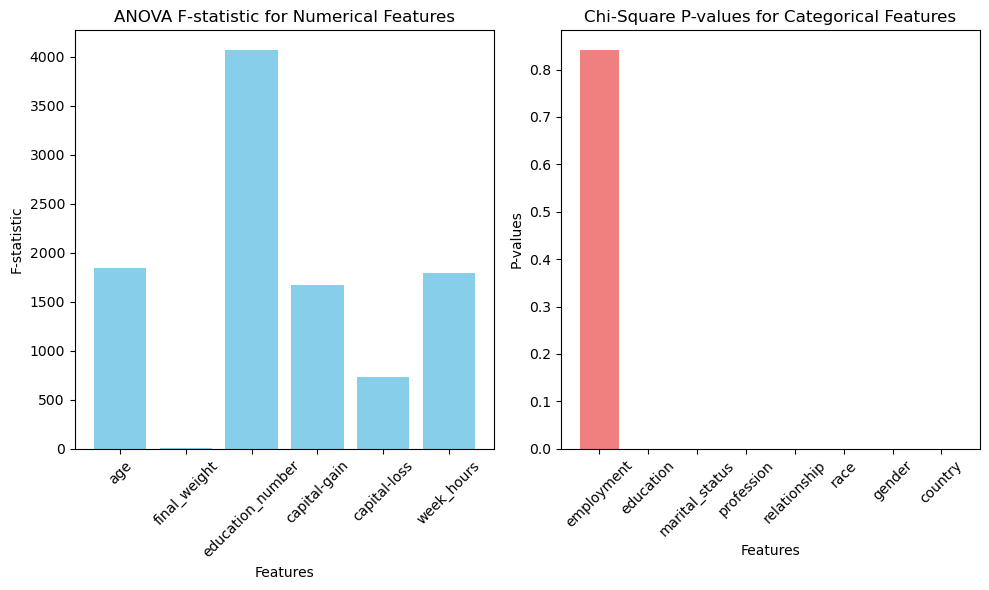

In [843]:
# Plotting ANOVA and Chi-Square results
plt.figure(figsize=(10, 6))

# ANOVA bar plot
plt.subplot(1, 2, 1)
plt.bar(anova_results.keys(), anova_results.values(), color='skyblue')
plt.title('ANOVA F-statistic for Numerical Features')
plt.xlabel('Features')
plt.ylabel('F-statistic')
plt.xticks(rotation=45)

# Chi-Square bar plot
plt.subplot(1, 2, 2)
plt.bar(chi2_results.keys(), chi2_results.values(), color='lightcoral')
plt.title('Chi-Square P-values for Categorical Features')
plt.xlabel('Features')
plt.ylabel('P-values')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [846]:
#dropping  of country column
df.drop('country', axis=1, inplace=True)
print('The country column is deleted')

The country column is deleted


In [848]:
#data set columns after dropping country column
print(df.columns)

Index(['age', 'employment', 'final_weight', 'education', 'education_number',
       'marital_status', 'profession', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'week_hours', 'income'],
      dtype='object')


In [852]:
#dropping of Capital Gain column
df.drop('capital-gain', axis=1, inplace=True)
print('The capital-gain column is deleted')

The capital-gain column is deleted


In [850]:
#data set columns after dropping capital gain column
print(df.columns)

Index(['age', 'employment', 'final_weight', 'education', 'education_number',
       'marital_status', 'profession', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'week_hours', 'income'],
      dtype='object')


In [854]:
#dropping of capital loss column
df.drop('capital-loss', axis=1, inplace=True)
print('The capital-loss column is deleted')

The capital-loss column is deleted


In [856]:
#data set columns after dropping capital loss column
print(df.columns)

Index(['age', 'employment', 'final_weight', 'education', 'education_number',
       'marital_status', 'profession', 'relationship', 'race', 'gender',
       'week_hours', 'income'],
      dtype='object')


In [858]:
df['income'] = df['income'].str.strip()

income_mapping = {"<=50K": 0, ">50K": 1}

df['income'] = df['income'].map(income_mapping)

income_counts = df['income'].value_counts()

print(income_counts)
print(df['income'].unique())
print('income is mapped to 0 & 1')

income
0    24282
1     7695
Name: count, dtype: int64
[0 1]
income is mapped to 0 & 1


In [860]:
df.head()

,age,employment,final_weight,education,education_number,marital_status,profession,relationship,race,gender,week_hours,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,0


In [862]:
cat_col = df.select_dtypes(include=['object']).columns
print(cat_col)

Index(['employment', 'education', 'marital_status', 'profession',
       'relationship', 'race', 'gender'],
      dtype='object')


In [864]:
df.head()

,age,employment,final_weight,education,education_number,marital_status,profession,relationship,race,gender,week_hours,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,0


In [866]:
label_encoders = {}
for col in cat_col:
    # Initializing the encoder for each column
    lbl_encoder = LabelEncoder()
    
    # Transforming the categorical column with label encoding
    df[col] = lbl_encoder.fit_transform(df[col])
    
    # Storeingthe encoder object for later use
    label_encoders[col] = lbl_encoder

In [868]:
df.head()

,age,employment,final_weight,education,education_number,marital_status,profession,relationship,race,gender,week_hours,income
0,50,5,83311,9,13,2,3,0,4,1,13,0
1,38,3,215646,11,9,0,5,1,4,1,40,0
2,53,3,234721,1,7,2,5,0,2,1,40,0
3,28,3,338409,9,13,2,9,5,2,0,40,0
4,37,3,284582,12,14,2,3,5,4,0,40,0


In [872]:
#transforming these columns to standard format
numerical_cols = ['age', 'final_weight', 'education_number','week_hours']

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df.head())

        age  employment  final_weight  education  education_number  \
0  0.835962           5     -1.006460          9          1.143809   
1 -0.042381           3      0.245246         11         -0.418316   
2  1.055548           3      0.425670          1         -1.199378   
3 -0.774334           3      1.406415          9          1.143809   
4 -0.115576           3      0.897286         12          1.534341   

   marital_status  profession  relationship  race  gender  week_hours  income  
0               2           3             0     4       1   -2.220918       0  
1               0           5             1     4       1   -0.033848       0  
2               2           5             0     2       1   -0.033848       0  
3               2           9             5     2       0   -0.033848       0  
4               2           3             5     4       0   -0.033848       0  


In [874]:
#Droping X Vecotr for feature space
X = df.drop('income', axis=1)

#adding target in a seperate array
y = df['income']

In [876]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [878]:
X_train.shape

(25581, 11)

In [880]:
X_test.shape

(6396, 11)

In [882]:
y_train.shape

(25581,)

In [884]:
y_test.shape

(6396,)

In [886]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [744]:
# Predictions and accuracy
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy on Test Set:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy on Test Set: 0.8286429018136335


In [894]:
precision = precision_score(y_test, y_pred_svm)
print(f"Precision: {precision:.4f}")

Precision: 0.6956


In [896]:
f1 = f1_score(y_test, y_pred_svm)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.5456


In [898]:
auc = roc_auc_score(y_test, y_pred_svm)
print(f"AUC-ROC: {auc:.4f}")

AUC-ROC: 0.6952


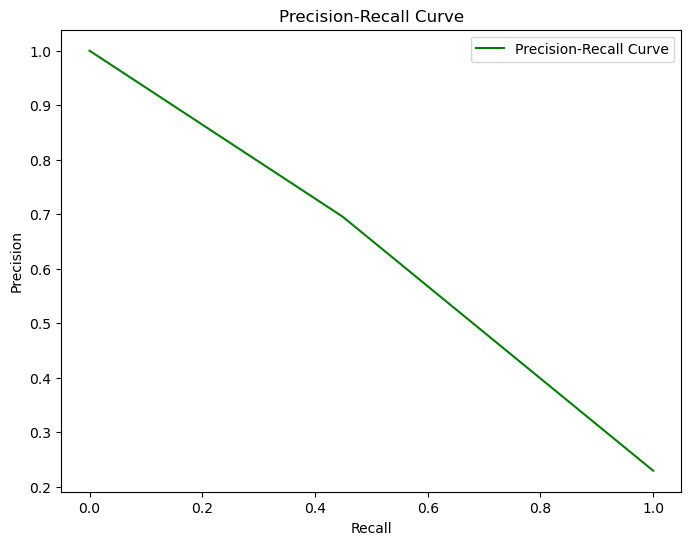

In [908]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

Confusion Matrix:
 [[4642  288]
 [ 808  658]]


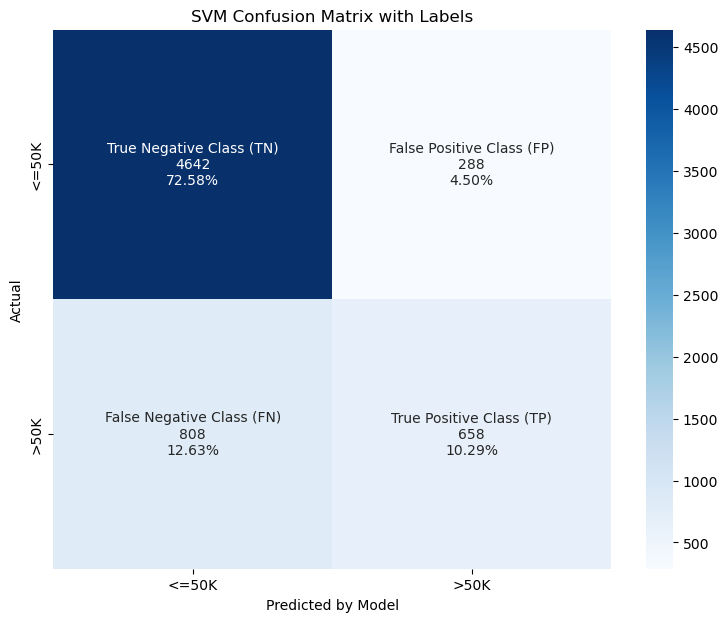

In [752]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", conf_matrix)

# Defining class labels
class_labels = ['True Negative Class (TN)', 'False Positive Class (FP)', 'False Negative Class (FN)', 'True Positive Class (TP)']

# Formatting group counts and percentages
count_values = [f"{int(val)}" for val in conf_matrix.ravel()]
percentage_values = [f"{val:.2%}" for val in conf_matrix.ravel() / np.sum(conf_matrix)]

# Creating labels combining names, counts, and percentages
combined_labels = [f"{label}\n{count}\n{percent}" for label, count, percent in zip(class_labels, count_values, percentage_values)]
combined_labels = np.array(combined_labels).reshape(2, 2)

# Plotting the confusion matrix with annotations
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix, annot=combined_labels, fmt='', cmap="Blues", 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])

plt.ylabel('Actual')
plt.xlabel('Predicted by Model')
plt.title('SVM Confusion Matrix with Labels')
plt.show()

In [910]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [912]:
# Predictions and accuracy
y_pred_rf = rf.predict(X_test)
print("RF Accuracy on Test Set:", accuracy_score(y_test, y_pred_rf))

rf Accuracy on Test Set: 0.8339587242026266


In [914]:
precision = precision_score(y_test, y_pred_rf)
print(f"Precision: {precision:.4f}")

Precision: 0.6551


In [916]:
recall = recall_score(y_test, y_pred_rf)
print(f"Recall: {recall:.4f}")

Recall: 0.5819


In [918]:
f1 = f1_score(y_test, y_pred_rf)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.6163


In [920]:
auc = roc_auc_score(y_test, y_pred_rf)
print(f"AUC-ROC: {auc:.4f}")

AUC-ROC: 0.7454


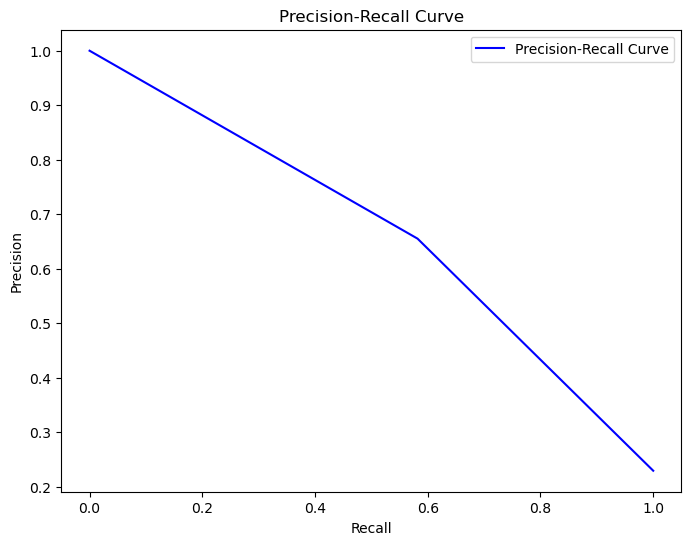

In [922]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve", color="Blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

Confusion Matrix:
 [[4481  449]
 [ 613  853]]


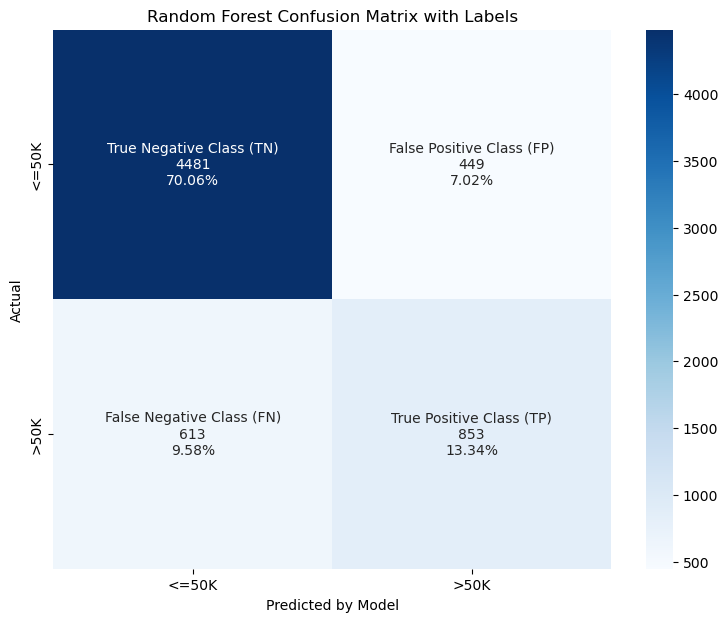

In [924]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)

# Defining class labels
class_labels = ['True Negative Class (TN)', 'False Positive Class (FP)', 'False Negative Class (FN)', 'True Positive Class (TP)']

# Formatting group counts and percentages
count_values = [f"{int(val)}" for val in conf_matrix.ravel()]
percentage_values = [f"{val:.2%}" for val in conf_matrix.ravel() / np.sum(conf_matrix)]

# Creating labels combining names, counts, and percentages
combined_labels = [f"{label}\n{count}\n{percent}" for label, count, percent in zip(class_labels, count_values, percentage_values)]
combined_labels = np.array(combined_labels).reshape(2, 2)

# Plotting the confusion matrix with annotations
plt.figure(figsize=(9, 7))
sns.heatmap(conf_matrix, annot=combined_labels, fmt='', cmap="Blues", 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])

plt.ylabel('Actual')
plt.xlabel('Predicted by Model')
plt.title('Random Forest Confusion Matrix with Labels')
plt.show()